# 量化交易学习

### 获取历史股票数据

In [2]:
import yfinance as yf

In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# 获取股票数据
symbol = "600519.SS"
start_date = "2022-01-01"
end_date = "2025-01-01"

data = yf.download(symbol, start=start_date, end=end_date)
print(data.head())

/var/folders/mv/xy0dcv652js8mbvxhxmnc5z00000gn/T/ipykernel_46930/1004481466.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open    Volume
Ticker        600519.SS    600519.SS    600519.SS    600519.SS 600519.SS
Date                                                                    
2022-01-04  1890.779663  1907.113551  1856.461868  1894.254786   3384262
2022-01-05  1865.679810  1903.472731  1860.149138  1885.037159   2839551
2022-01-06  1827.167725  1876.740999  1786.876823  1863.845327   5179475
2022-01-07  1790.093994  1833.306978  1787.623578  1820.512687   2981669
2022-01-10  1812.216553  1822.356116  1767.556429  1777.198196   2962670


### 简单的数据分析和可视化

[*********************100%***********************]  1 of 1 completed

Price     Adj Close        Close         High          Low         Open  \
Ticker    513500.SS    513500.SS    513500.SS    513500.SS    513500.SS   
count   2554.000000  2554.000000  2554.000000  2554.000000  2554.000000   
mean       1.161717     1.161717     1.166116     1.156674     1.161324   
std        0.454981     0.454981     0.456280     0.453281     0.454797   
min        0.548500     0.548500     0.552500     0.518000     0.536500   
25%        0.788750     0.788750     0.793000     0.786000     0.789625   
50%        1.063000     1.063000     1.067250     1.059000     1.063750   
75%        1.379000     1.379000     1.382500     1.377375     1.380375   
max        2.288000     2.288000     2.501000     2.282000     2.501000   

Price         Volume  
Ticker     513500.SS  
count   2.554000e+03  
mean    8.721373e+07  
std     9.500219e+07  
min     0.000000e+00  
25%     5.397200e+06  
50%     6.497760e+07  
75%     1.333660e+08  
max     9.503586e+08  


NameError: name 'plt' is not defined

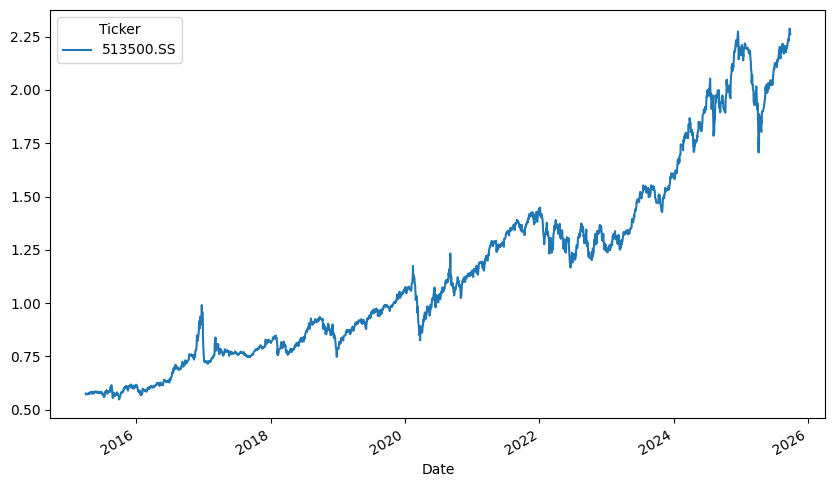

In [6]:
# 获取股票数据
symbol = "513500.SS"
start_date = "2015-03-31"
end_date = "2025-06-01"

data = yf.download(symbol, start=start_date, end=None, auto_adjust=False)
# 简单的数据分析
print(data.describe())

# 绘制股价走势图
data['Close'].plot(figsize=(10, 6), label=symbol)
plt.title(f"{symbol} Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

### 移动平均交叉策略

我们可以使用雅虎金融库 (yfinance) 获取贵州茅台（600519.SS）的股票数据，并基于移动平均策略进行简单的演示

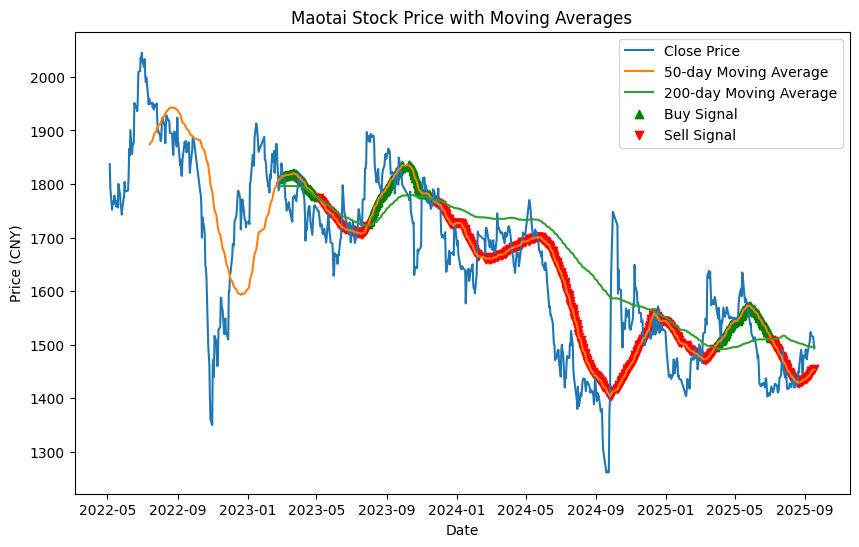

In [26]:
# 获取贵州茅台股票数据
symbol = "600519.SS"
start_date = "2022-05-01"
end_date = "2025-12-01"

data = yf.download(symbol, start=start_date, end=end_date, auto_adjust=False, progress=False) # progress关闭进度条

# 计算短期（50天）和长期（200天）移动平均
data['MA_50'] = data['Close'].rolling(window=50).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()

# 生成买卖信号
data['Signal'] = 0
data.loc[data['MA_50'] > data['MA_200'], 'Signal'] = 1
data.loc[data['MA_50'] < data['MA_200'], 'Signal'] = -1
# 未写入原来的data导致的错误
# data['Signal'][data['MA_50'] > data['MA_200']] = 1  # 短期均线上穿长期均线，产生买入信号
# data['Signal'][data['MA_50'] < data['MA_200']] = -1  # 短期均线下穿长期均线，产生卖出信号

# 绘制股价和移动平均线
plt.figure(figsize=(10, 6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA_50'], label='50-day Moving Average')
plt.plot(data['MA_200'], label='200-day Moving Average')

# 标记买卖信号
plt.scatter(data[data['Signal'] == 1].index, data[data['Signal'] == 1]['MA_50'], marker='^', color='g', label='Buy Signal')
plt.scatter(data[data['Signal'] == -1].index, data[data['Signal'] == -1]['MA_50'], marker='v', color='r', label='Sell Signal')

plt.title("Maotai Stock Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (CNY)")
plt.legend()
plt.show()

### 回测策略

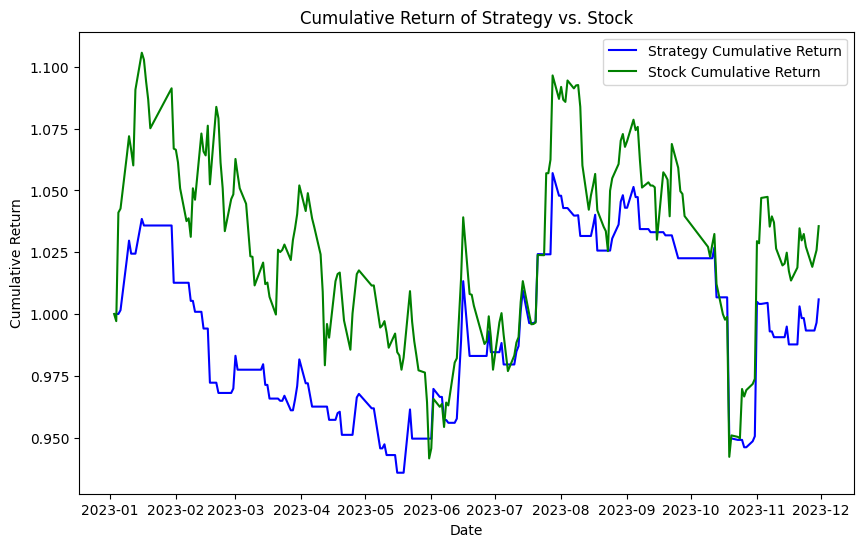

In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 获取股票数据
symbol = "600519.SS"
start_date = "2023-01-01"
end_date = "2023-12-01"

data = yf.download(symbol, start=start_date, end=end_date,auto_adjust=False, progress=False)

# 初始化交叉信号列
data['Signal'] = 0

# 计算每日收益率
data['Daily_Return'] = data['Close'].pct_change()

# 计算策略信号
data['Signal'] = 0
data.loc[data['Daily_Return'] > 0, 'Signal'] = 1  # 以涨幅为信号，可根据需要修改条件

# 计算策略收益
data['Strategy_Return'] = data['Signal'].shift(1) * data['Daily_Return']

# 计算累计收益
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()

# 绘制累计收益曲线
plt.figure(figsize=(10, 6))
plt.plot(data['Cumulative_Return'], label='Strategy Cumulative Return', color='b')
plt.plot(data['Close'] / data['Close'].iloc[0], label='Stock Cumulative Return', color='g')
plt.title("Cumulative Return of Strategy vs. Stock")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

## 量化交易基本策略

量化交易基于数据模型、统计学和计算机算法，通过系统性的方法识别和执行交易机会 <br>
以下是一些常见的量化交易基本策略

### 1. 移动平均策略

- **策略思想**：基于股价的历史平均值，通过计算短期和长期移动平均线之间的差异来产生买卖信号
- **实现方式**：计算短期和长期移动平均，当短期均线上穿长期均线时产生买入信号，反之产生卖出信号

### 2. 均值回归策略

- **策略思想**：基于价格的历史波动，认为价格在波动后会回归到其平均水平
- **实现方式**：通过计算价格与均值之间的差异，当价格偏离均值过多时产生买入或卖出信号

### 3. 动量策略

- **策略思想**：基于价格的趋势，认为价格趋势会持续一段时间
- **实现方式**：通过计算价格的变化率或其他趋势指标，产生买入或卖出信号

### 4. 市场中性策略

- **策略思想**：通过同时进行买入和卖出，以利用市场的相对强弱
- **实现方式**：基于两个或多个相关资产之间的价差或相关性，产生交易信号

### 5. 统计套利策略

- **策略思想**：基于统计学原理，寻求价格之间的临时不平衡，以实现套利
- **实现方式**：通过寻找价格、波动性或其他统计指标的异常值，产生交易信号

### 6. 事件驱动策略

- **策略思想**：基于特定事件或信息的发生，产生交易信号
- **实现方式**：监控新闻、财报、经济指标等，当发生特定事件时执行交易

### 7. 机器学习策略

- **策略思想**：利用机器学习算法从大量数据中学习模式，预测未来价格走势
- **实现方式**：使用回归、分类或深度学习模型，训练模型预测市场走势

### 8. 高频交易策略

- **策略思想**：通过快速执行大量交易来利用极短时间内的小价差
- **实现方式**：使用高性能算法和快速执行系统，通常涉及大量交易和低持仓时间